# Compléments sur le shell

**Attention**: utile la *table des matières* pour ouvrir chaque section.

## Caractères spéciaux

[Vidéo](https://vimeo.com/480030791)

Dans le terminal, le shell *interprète* certains caractères dits *spéciaux* et les remplace à la volée en fonction du contexte.

Voici quelques-uns de ces **caractères spéciaux** ([liste plus détaillée](https://abs.traduc.org/abs-5.1-fr/ch03.html)) et des exemples pour «sentir» comment cela fonctionne en pratique: 

| Caractères spéciaux |                                   Commentaires                                  |               Exemples à tester                        |
|:-------------------:|:-------------------------------------------------------------------------------:|:------------------------------------------------------:|
|         `*`         |                            *jocker* multi-caractères                            |                 `ls /bin/c*`                           |
|         `?`         |                              *jocker* uni-caractère                             |                 `ls /bin/*o?`                          |
|      `[` et `]`     |                              *classe* de caractères                             |                `ls /bin/[cd]*`                         |
|         `~`         |                          répertoire de l'utilisateur                            |                 `ls ~/P*/*1`                           |
|  `<espace>` ou ` `  |                              séparateur d'arguments                             |              `mkdir -p a b c d/e/f`                    |
|         `-`         |                        préfixe d'option «courte» de commande                    |                 `ls -l -h ~`                           |
|         `\|`        |                         tube (*pipe*) - voir un peu plus loin...                |           `ls -l /bin \| wc -l`                        |
|         `;`         |                             séquencer des commandes                             |             `cd ~/P*/*1; ls; pwd`                      |
|         `$`         |                              contenu d'une variable                             |  `a=52; echo a; echo $a`ou  `echo $USER`               |
|         `#`         |                                   commentaire                                   |  `wc -w f.txt  # affiche le nb de mots ...`            |
|      `<CTRL+C>`     |                   termine une commande en cours de traitement                   |  `ls -R /` saisir <CTRL+C> pour interrompre            |
|      `<CTRL+D>`     |                               EOF - *End Of File*                               | `cat` puis saisir: un <entrée> deux <entrée>  <CTRL+D> |
|      `"` et `'`     |  *quotes* - atténue ou supprime l'interprétation des caractères spéciaux        |  `echo *; echo "*"; echo "$a"; echo '$a'`              |


#### Notes et astuces

- `echo` affiche ses arguments à l'écran (*sortie standard*),

- `mkdir`: option `p` pour créer tous les répertoires intermédiaires d'un - «**p**ath» - chemin,

- `ls`: option `h` pour afficher la taille des fichiers dans un format «**h**umain» (plutôt que des octets); option `R` pour lister les répertoires «**R**écursivement»,

- `wc` (*word count*): option `w` pour afficher le nombre de - «**w**ords» - mots, option `l` pour le nombre de lignes,

-  ... mais on trouve tout ça dans le ... `man <nom_cmd>` ...!; pour chercher dans le **man**uel:
    - **se déplacer**: `G` -> aller tout à la fin, `gg` -> aller tout au début, `<espace>` -> avancer d'une page;
    - **chercher**: `/<motif>` où motif peut être un mot ou une *expression régulière* (prog. Term...) comme (à tester!) `/\s+-r` où `\s+` signifie un caractère blanc ou plus ...
        - une fois la recherche lancée: `n` -> sauter à la prochaine occurence, `N` -> à la précédente, `<ESC>-u` pour sortir...
    - arghhh! comment retenir tout ça ??? ... et bien je ne peux que te conseiller de *commencer* ton apprentissage de l'**éditeur vim** en lançant la commande `vimtutor`...

## Notion de processus - *Process* - ou tâche - *Task*

[Vidéo](https://vimeo.com/481803825)

[Vidéo](https://vimeo.com/480032646)

Chaque programme *en cours d'exécution* est qualifié de **processus** (abrégé *ps*).

#### Exemple

La commande `ls` est un fichier binaire exécutable `/bin/ls` qu'on appelle **programme**.
Lorsque vous saisissez cette commande dans le shell, puis que vous valider, ce *programme* est chargé par le système d'exploitation et devient dès lors un **processus**.

#### **En pratique**
- `ps -A`: affiche la liste de tous les processus en cours (option `A` pour **A**ll)
- `top`: affiche tous les processus à intervalle de temps régulier ... tape `q` pour quitter.
- `pstree`: affiche les processus en précisant leurs parents à l'aide d'un arbre.

## Des processus, un processeur: l'ordonnancement

De nos jours, les systèmes d'exploitation sont dits **multi-tâches**. On veut dire qu'ils donnent l'*illusion que tous les processus sont exécutés simultanément*. 

En effet, en plus de donner accès au matériel par l'intermédiaire d'un système de fichiers, le système d'exploitation a aussi pour rôle d'**ordonnancer les processus** (*scheduler*). Voilà la situation:

- D'une part, **des**  *processus* en attente (environ une *centaine*) ... d'une **ressource**,
- d'autre part, **un** (quelques pour un multi-coeurs) *processeur*(s) - **la ressource attendu** par les processus ...

Le **problème** est donc: 

> comment exécuter tout ces processus en donnant l'**illusion** à l'utilisateur qu'ils se déroulent en même temps - *multi-tâche*.

**Solution**: Partager le temps pendant lequel **la ressource processeur** est attribuée - *allouée* - à l'**un** des processus en cours; on appelle cela l'**ordonnancement** des processus.

Voilà comment cela se passe dans les grandes lignes ...:
1. Sélectionner un processus «prêt» et lui *allouer* le processeur (état «élu»),
2. attendre un laps de temps donné - *quantum* - de l'ordre de quelques dizaine de millisecondes,
3. le processus «élu» est **préempté** et passe à l'état «prêt» s'il n'a pas terminé: le processeur est alors de nouveau libre,
4. reprendre à l'étape 1....

**Résultat**: l'*illusion* que tout se déroule en même temps (en parallèles) alors qu'en fait, *à un instant donné*, seul un processus s'exécute sur le processeur!

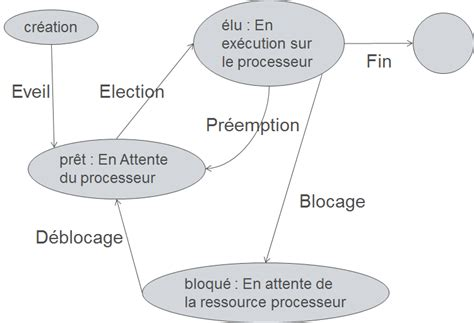

#### Note sur l'état «bloqué»

Le **blocage** correspond, par exemple, à l'*ouverture d'un fichier* (de l'ordre de la milliseconde: $10^{-3}$s) par le processus «élu». En effet, le fichier se trouve sur le **disque dur** de l'ordinateur (et non et en mémoire principale RAM) et il faut quelques millisecondes pour que le disque puisse transmettre le fichier.

Cette ouverture est **très longue à l'échelle du processeur**. En effet, le temps d'exécution d'une «micro-opération» par le processeur est de l'ordre de la **nanoseconde** ($10^{-9}$s - un milliardième de seconde), or dans $1$ms, il y a **1 million** de *nanosecondes*. Ainsi, lorsqu'un programme demande l'ouverture d'un fichier, il ne peut plus rien faire avant que le fichier ne soit chargé en **mémoire centrale** - RAM...

Pour cette raison, l'ordonnanceur du système d'exploitation «bloque» alors le processus «élu» et libère le processeur (en attendant que la ressource demandée arrive du disque)...

... puis il sélectionne un processus dans l'état «prêt» et lui alloue le processeur...

... le fichier arrive finalement ... l'ordonnanceur débloque le processus «bloqué» c'est-à-dire le fait passer dans l'état «prêt» (et non élu!). 

## Entrée et sortie standard d'un processus

[Vidéo](https://vimeo.com/481806397)

À chaque **processus** UNIX - votre programme *python* lorsque vous l'exécuter! - est associé par défaut:

- une **entrée standard** (*standard input*) - **stdin** - un fichier spécial par le biais duquel:

  - il peut **recevoir** des données du système - souvent rattaché au **clavier** (*keyboard*)


- une **sortie standard** (*standard output*) - **stdout** - fichier spécial par le biais duquel:

  - il peut **fournir** des données au système - souvent rattaché à l'**écran** (*display*)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Stdstreams-notitle.svg/400px-Stdstreams-notitle.svg.png" />

#### Notes pour les curieux

- En toute rigueur, il y a aussi une **sortie d'erreur standard** - *stderr* - elle aussi souvent reliée à l'écran,
- chaque processus possède un identifiant numérique appelé **pid** (**P**rocess **ID**entifier).
- Les processus sont en fait reliés entre eux et forment une arborescence un peu comme le système de fichier: essayer la commande `pstree`.

## Redirections et tubes - *pipes*

L' *entrée* et la *sortie* standard d'un processus peuvent-être **redirigées**.

### Redirection de la sortie standard

Au lieu d'afficher à l'écran - *sortie standard* - ce que produit la commande `ls` (des lignes de texte), on souhaite **rediriger** ce texte dans ... un fichier.

Nous voulons donc rediriger le **stdout** du processus `ls` afin que ce soit un fichier; Pour cela on utilise l'un des *caractères spéciaux*:

- `>` suivi d'un nom de fichier: 

    modifie la *sortie standard* de la commande - **stdout** - afin de la faire «pointer» sur le fichier (s'il existe son contenu est écrasé, sinon le fichier est créé)

- `>>` suivi d'un nom de fichier:
    
    idem mais la sortie de la commande est **ajoutée** après la dernière ligne du fichier existant (mode *append*)

#### Exemple1

```
$ ls -l > lsfich
$ echo "trop fort" >> lsfich
$ tail lsfich
```

#### Exemple2

```
$ echo '#!/usr/bin/python3' > oh
$ file oh
... (voir note)
$ echo 'print("cool!")' >> oh
$ chmod u+x oh
$ oh
erreur ... lire le message!
$ ./oh # rappel «.» désigne le répertoire courant ...
Pyth et ls, c'est ... :-o
$ ./oh > testfich
$ cat testfich
```

#### Notes pour l'exemple 2

- **ligne shebang**: c'est le nom qu'on donne à l'écriture `#!/usr/bin/python3` (sans espace) dans les systèmes UNIX.

  Cette ligne, qui doit être la première et qui est de la forme `#!<chemin_programme>`, indique à l'OS que, pour exécuter ce fichier, il faut faire appel au programme interpréteur indiqué.


- Pour exécuter un fichier «exécutable», on ne peut directement fournir son nom, car le shell cherche les commandes dans un certain nombre de répertoires prédéfinis. Pour connaître ces répertoire saisir `echo $PATH` qui est une variable «spéciale» et très importante du shell.
    - petite expérience pour bien comprendre: `echo $PATH; PATH=".:"$PATH; echo $PATH; oh`


- *Petite question en passant*: devines-tu pourquoi on ne peut pas écrire `a = 12` dans le shell (mais `a=12` est ok)??? Tu as toutes les informations pour le comprendre ... réfléchis!

### Redirection de l'entrée standard

Moins utile en pratique, nous n'en parlerons pas sauf dans le cadre des tubes ci-après.

### Chaînage de commande: Les tubes ou *pipes*

**Idée clé au coeur des systèmes UNIX**

> Chaque commande fait une petite tâche et la fait bien,
>
> chaque commande est conçue pour travailler avec les autres,
>
> pour faire une tâche «complexe», **combine** ces commandes avec des **tubes**.

Un «tube» - *pipe* - entre deux commandes est de la forme:  «`cmd1 | cmd2`» 

L'idée d'un tube est de *rediriger* la sortie de `cmd1` (son *stdout*) sur l'entrée de `cmd2` (son *stdin*). 

On peut s'imaginer que `cmd1` jette sa sortie à l'entrée du tube et que `cmd2` prend son entrée à la sortie du même tube.

#### Exemple

L'écriture `ls | wc` s'interprète comme suit:

- `ls` envoi la chaîne de caractères des fichiers du répertoire courant dans le **tube**,
- `wc` récupère en entrée cette chaîne, fait son travail (compter les lignes, mots ...) et affiche le résultat sur sa sortie (l'écran). 

<img src="unix_pipe.png" />

Bien sûr, on peut «chaîner» autant de commandes que l'on veut.

<img src="https://wiki-gateway.frdic.com/wikipedia_zh/I/m/Pipeline.svg.png"/>

**Note**: on devrait mettre *Process* au lieu de *Program* dans la figure ci-dessus.

#### Un exemple pour trois commandes

`cat /proc/cpuinfo | grep processor | wc -l` permet de connaître le nombre de processeurs...